# Project Setup
We first check what we are working with and will set the colab environment up to meet our requirements. 

## Step 1: Clone the repository

In [1]:
!git clone https://github.com/benearnthof/open_science_mnist.git

fatal: destination path 'open_science_mnist' already exists and is not an empty directory.


In [1]:
# 'open_science_mnist' & 'sample_data'
!ls

data  open_science_mnist  sample_data


In [2]:
# sample_data contains mnist in .csv form, we will download the official version of the dataset later. 
# for now we switch to the root directory of our project
%cd /content/open_science_mnist
!pwd

/content/open_science_mnist
/content/open_science_mnist


In [3]:
# We are working with pip version 22.0.4 and python 3.8
!pip --version

pip 22.0.4 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)


In [5]:
# installing pipenv
!pip install --user pipenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# add the location of the pipenv scripts to $PATH
import os
os.environ['PATH'] += ':/root/.local/bin'

In [7]:
# this should now have /root/.local/bin added at the end
! echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/root/.local/bin


In [8]:
# setting up a virtualenv for this project
!pipenv install

Creating a virtualenv for this project...
Pipfile: /content/open_science_mnist/Pipfile
Using /usr/local/bin/python (3.8.16) to create virtualenv...
⠧ Creating virtual environment...created virtual environment CPython3.8.16.final.0-64 in 1241ms
  creator CPython3Posix(dest=/root/.local/share/virtualenvs/open_science_mnist-fq3yB1ln, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==22.3.1, setuptools==65.6.3, wheel==0.38.4
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator

✔ Successfully created virtual environment!
⠧ Creating virtual environment...
Virtualenv location: /root/.local/share/virtualenvs/open_science_mnist-fq3yB1ln
Installing dependencies from Pipfile.lock (fbd99e)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command in

In [8]:
!pipenv graph

argparse==1.4.0
torchvision==0.14.1
  - numpy [required: Any, installed: 1.24.1]
  - pillow [required: >=5.3.0,!=8.3.*, installed: 9.4.0]
  - requests [required: Any, installed: 2.28.1]
    - certifi [required: >=2017.4.17, installed: 2022.12.7]
    - charset-normalizer [required: >=2,<3, installed: 2.1.1]
    - idna [required: >=2.5,<4, installed: 3.4]
    - urllib3 [required: >=1.21.1,<1.27, installed: 1.26.14]
  - torch [required: ==1.13.1, installed: 1.13.1]
    - nvidia-cublas-cu11 [required: ==11.10.3.66, installed: 11.10.3.66]
      - setuptools [required: Any, installed: 65.6.3]
      - wheel [required: Any, installed: 0.38.4]
    - nvidia-cuda-nvrtc-cu11 [required: ==11.7.99, installed: 11.7.99]
    - nvidia-cuda-runtime-cu11 [required: ==11.7.99, installed: 11.7.99]
      - setuptools [required: Any, installed: 65.6.3]
      - wheel [required: Any, installed: 0.38.4]
    - nvidia-cudnn-cu11 [required: ==8.5.0.96, installed: 8.5.0.96]
      - nvidia-cublas-cu11 [required: Any,

If the environment setup worked, the command above should have produced a dependency graph of the required packages. We will now proceed with running our experiments.

# Step 2: Importing the Dataset

We will make use of the MNIST version the torchvision package provides.

In [4]:
from torchvision import datasets, transforms
import torch
from torchvision.datasets import MNIST
import argparse
from utils import Parameters

In [5]:
# first we need to import our data loaders for train & test data
from dataloader import TrainLoader, TestLoader
# let us first visualize some of the pictures in the dataset
train_loader = TrainLoader()
batch_idx, (data, target) = next(enumerate(train_loader))
data.shape # 32 images with 1 channel and 28 by 28 pixels

torch.Size([32, 1, 28, 28])

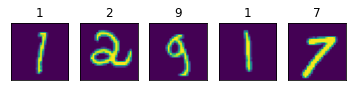

In [6]:
from utils import quick_plot, plot_25, plot_1
# quick verification if our data loader works correctly
quick_plot(data, target)

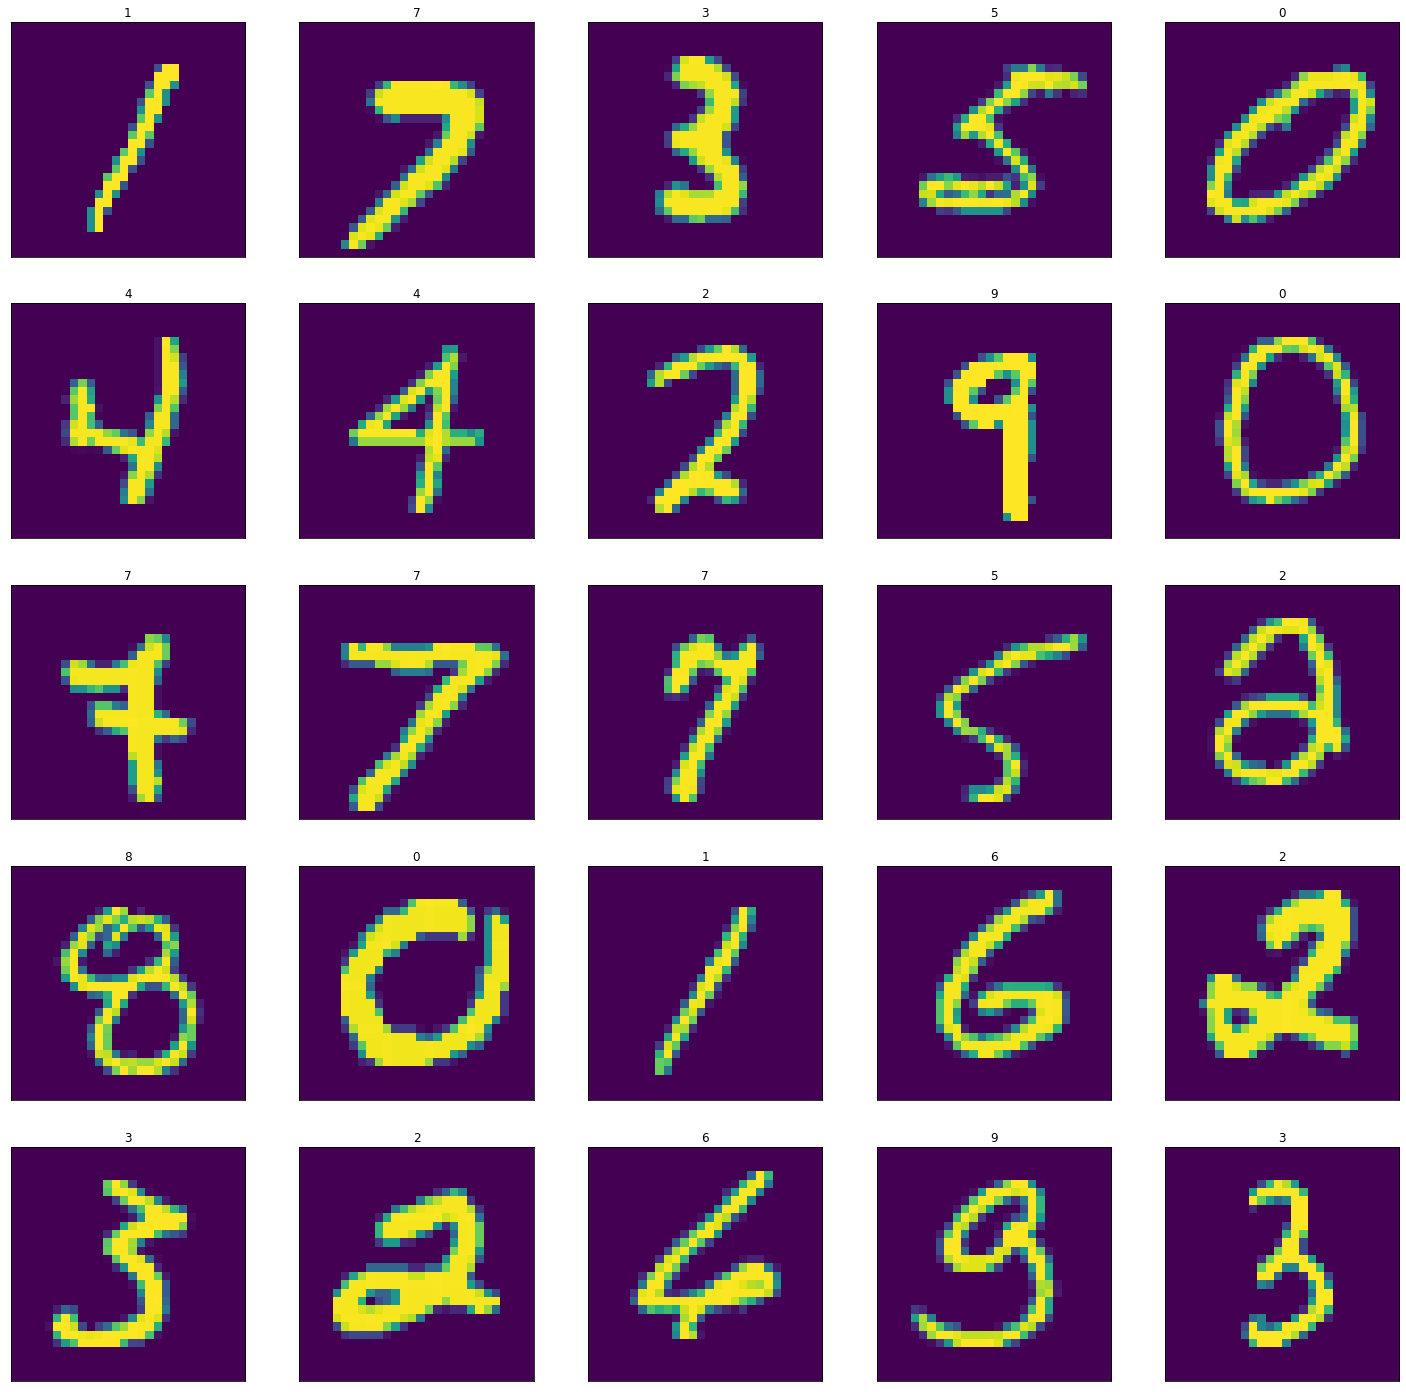

In [7]:
# let's view more digits at once
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()
plot_25(images, labels)

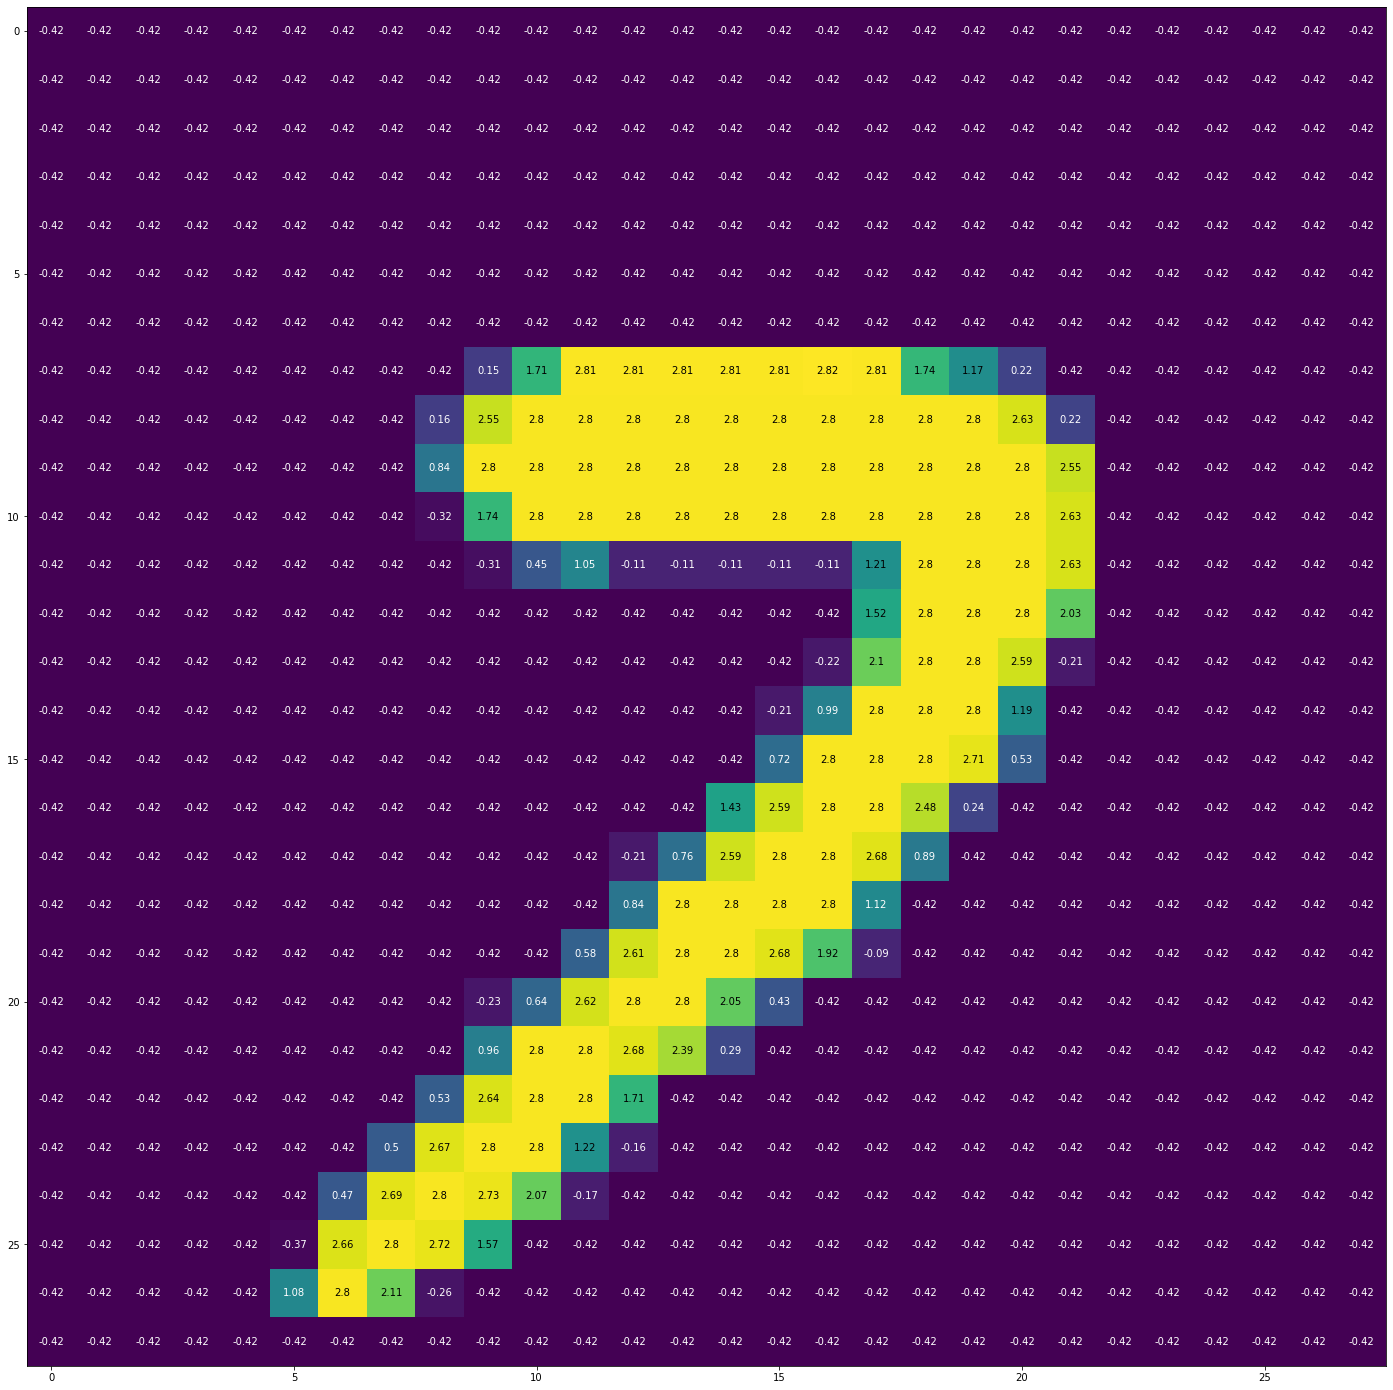

In [8]:
# let's take a closer look at a single digit and its pixel values
from numpy import squeeze
img = squeeze(images[1])
plot_1(img)

# Step 3: Setting up the Model

In [10]:
from models import ConvNet, FCNet
model = FCNet()
print(model)

FCNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


# Step 4: Specify Loss & Optimizer

In [12]:
# negative log likelihood loss 
# https://pytorch.org/docs/stable/generated/torch.nn.functional.nll_loss.html
import torch.nn.functional as F
loss_function = F.nll_loss
# optimizer: standard SGD
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step 5: Train the Model

In [13]:
n_epochs = 10
model.train()

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    for data, target in train_loader:
        optimizer.zero_grad()
        # apply model to data & calculate loss
        output = model(data)
        loss = loss_function(output, target)
        # calculate gradients & perform optim.step
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.4f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.9780
Epoch: 2 	Training Loss: 0.6666
Epoch: 3 	Training Loss: 0.6139
Epoch: 4 	Training Loss: 0.5825
Epoch: 5 	Training Loss: 0.5602
Epoch: 6 	Training Loss: 0.5442
Epoch: 7 	Training Loss: 0.5318
Epoch: 8 	Training Loss: 0.5216
Epoch: 9 	Training Loss: 0.5139
Epoch: 10 	Training Loss: 0.5070


In [19]:
# evaluating model performance
import numpy as np
from utils import Parameters

params = Parameters()
test_loader = TestLoader()
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    output = model(data)
    loss = loss_function(output, target)
    test_loss += loss.item()*data.size(0)
    # convert output logits to class predictions
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(params.test_batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.535134

Test Accuracy of     0: 94% (929/980)
Test Accuracy of     1: 98% (1122/1135)
Test Accuracy of     2:  0% ( 0/1032)
Test Accuracy of     3: 98% (992/1010)
Test Accuracy of     4: 98% (967/982)
Test Accuracy of     5: 97% (870/892)
Test Accuracy of     6: 97% (936/958)
Test Accuracy of     7: 97% (999/1028)
Test Accuracy of     8: 97% (953/974)
Test Accuracy of     9: 95% (960/1009)

Test Accuracy (Overall): 87% (8728/10000)


In [20]:
# to install individual packages:
#!pipenv install argparse
